### RED NEURONAL
#### Cojunto de Datos... Keras.MNIST 

##### Librerias

In [377]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout,Flatten
from keras.models import Sequential , load_model
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

#### Cargando conjunto de Datos para Entrenamiento y Prueba del modelo

In [391]:
(X_train, y_train), (x_test, y_test) = mnist.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


#### Dividiendo conjunto de datos de entrenamiento a entrenamiento y validacion

In [392]:
x_valid, x_train = X_train[:10000], X_train[10000:]
y_valid, y_train = y_train[:10000], y_train[10000:]

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Train_val: X=%s, y=%s' % (x_valid.shape, y_valid.shape))

#Ahora contamos con 50k imagenes para el entrenamiento y 10k para la validacion simultanea en el modelo.

Train: X=(50000, 28, 28), y=(50000,)
Train_val: X=(10000, 28, 28), y=(10000,)


#### Visualizando las primeras 9 imagenes

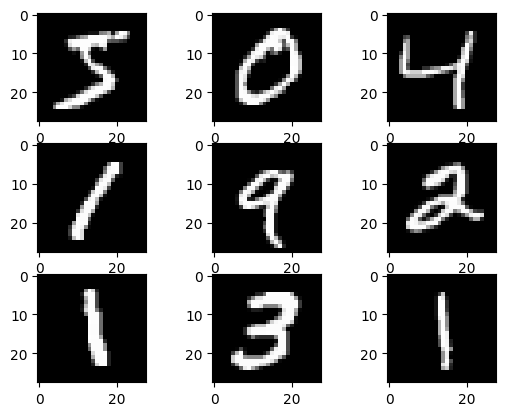

In [380]:

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
	
plt.show()

#### Procesamiento de Datos

In [381]:
#Si no se usa una capa Flatten es necesario transformar los datos de entrada(imagenes) de 2D a 1D
#esto se consigue multiplicando las dimensiones 28 x 28 pixeles = 784 pixeles

num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_valid = x_valid.reshape(x_valid.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')


print('Numero de pixeles : {:.0f}'.format(num_pixels))

Numero de pixeles : 784


In [382]:
# Normalizamos las entradas ya que lo valores pixeles se representan en una matriz desde 0-255 la pasamos a  0-1
x_train = x_train / 255
x_valid = x_valid / 255
x_test = x_test / 255

In [383]:
# Una codificacion de categoria (0-9) a One Hot a la salida.
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

print('Numero de etiquetas: {:.0f}'.format(y_train.shape[1]))

Numero de etiquetas: 10


#### Definicion del modelos y las capas

In [384]:
modelo = Sequential()
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal", input_dim = num_pixels))
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo.add(Dense(10, activation  = 'softmax'))

In [385]:
modelo.compile(optimizer= Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


#### Entrenamiento

In [386]:
EarlyStopping_monitor = EarlyStopping(patience = 3, monitor= "val_loss")
model = modelo.fit(x_train,y_train, validation_data= (x_valid,y_valid), epochs = 20 ,callbacks= [EarlyStopping_monitor])

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2438 - accuracy: 0.9245 - val_loss: 0.1308 - val_accuracy: 0.9599
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1261 - accuracy: 0.9611 - val_loss: 0.1220 - val_accuracy: 0.9614
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0935 - accuracy: 0.9706 - val_loss: 0.1263 - val_accuracy: 0.9634
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0775 - accuracy: 0.9753 - val_loss: 0.1131 - val_accuracy: 0.9673
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0652 - accuracy: 0.9791 - val_loss: 0.1091 - val_accuracy: 0.9704
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0556 - accuracy: 0.9819 - val_loss: 0.0955 - val_accuracy: 0.9740
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.1170 - val_accuracy:

#### Evaluacion con los datos de prueba que el modelo no ha visto.

In [387]:
# Final evaluacion del model
scores = modelo.evaluate(x_test, y_test)
print("Error de linea base: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9750
Error de linea base: 2.50%


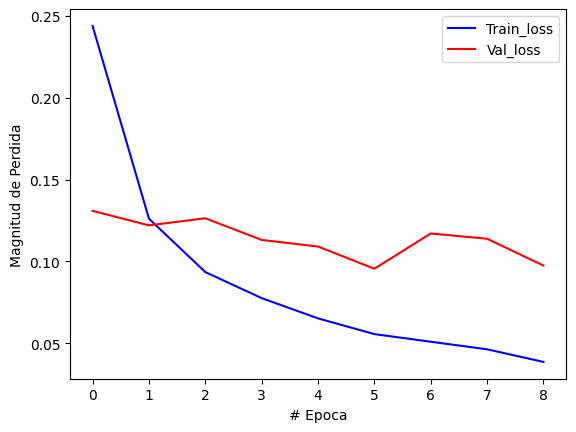

In [388]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de Perdida")
plt.plot(model.history['loss'],'b', label='Train_loss')
plt.plot(model.history['val_loss'], 'r', label='Val_loss')
plt.legend(loc='upper right')
plt.show()

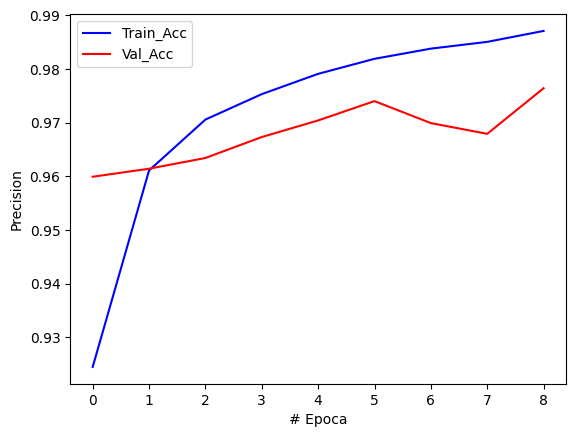

In [389]:
plt.xlabel("# Epoca")
plt.ylabel("Precision")
plt.plot(model.history['accuracy'], 'b', label = 'Train_Acc')
plt.plot(model.history['val_accuracy'], 'r', label = 'Val_Acc')
plt.legend(loc='upper left')
plt.show()

#### Validacion de la prediccion del modelo.

313/313 [==============================] - 1s 2ms/step
Predicion es el numero:  6


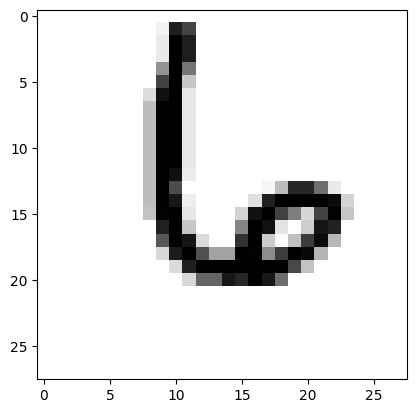

In [390]:
#Especificamos el numero de la imagen en el conjunto de datos de prueba y lo graficamos.
image = 156
imagen_test = plt.imshow(x_test.reshape([10000,28,28])[image], cmap=plt.cm.binary)

#Arrojamos la predicion del modelo con el conjunto de datos de prueba en la prediccion del numero de imagen espeficicado.
prediction = modelo.predict(x_test)
print("Predicion es el numero: ", np.argmax(prediction[image]) )